In [11]:
# PROBLEM STATEMENT 10 - AKASH SHRUSTI
import pandas as pd
hospital_data = pd.read_csv('hospitals.csv')
hospital_data.head()
metadata = pd.read_csv('metadata.csv')
metadata.head()
acronyms_mapping = {
    'PHC': 'Number of Primary Health Centers(PHCs)',
    'CHC': 'Community Health Centers(CHCs)',
    'SDH':'Sub-District/Divisional Hospital(SDHs)',
    'DH':'District Hospital(DHs)'
}

hospital_data.columns = ['State/Ut'] + [acronyms_mapping.get(col, col) for col in hospital_data.columns[1:]]
hospital_data.head()
hospital_data.columns = [col.title() for col in hospital_data.columns]
hospital_data.head()

,State/Ut,Number Of Primary Health Centers(Phcs),Community Health Centers(Chcs),Sub-District/Divisional Hospital(Sdhs),District Hospital(Dhs),Hospitals,Hospitalbeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [2]:
# PROBLEM STATEMENT 11 - HARIKA
import os
import pandas as pd
def standardize_state_names(dataframe, state_corrections):
    dataframe['State/Ut'] = dataframe['State/Ut'].str.strip().str.title()
    dataframe['State/Ut'] = dataframe['State/Ut'].replace(state_corrections)
    return dataframe
state_corrections = {
    'Andaman & Nicobar Islands' :'ANDAMAN & NICOBAR ISLANDS',
    'Andhra Pradesh':'ANDHRA PRADESH',
    'Arunachal Pradesh':'ARUNACHAL PRADESH',
    'Assam':'ASSAM',
    'Bihar':'BIHAR',
    'Chandigarh':'CHANDIGARH',
    'Chattisgarh':'CHATTISGARH',
    'Dadra and Nagar Haveli':'DADRA AND NAGAR HAVELI',
    'Delhi':'NCT OF DELHI',
    'Goa':'GOA',
    'Gujarat':'GUJURAT',
    'Haryana':'HARYANA',
    'Himachal Pradesh':'HIMACHAL PRADESH',
    'Jammu & Kashmir':'JAMMU & KASHMIR',
    'Jharkhand':'JHARKHAND',
    'Karnataka':'KARNATAKA',
    'Kerala':'KERALA',
    'Lakshadweep':'LAKSHADWEEP',
    'Madhya Pradesh':'MADHYA PRADESH',
    'Maharashtra':'MAHARASHTRA',
    'Manipur':'MANIPUR',
    'Meghalaya':'MEGHALAYA',
    'Mizoram':'MIZORAM',
    'Nagaland':'NAGALAND',
    'Odisha':'ODHISHA',
    'Puducherry':'PUDUCHERRY',
    'Punjab':'PUNJAB',
    'Rajasthan':'RAJASTHAN',
    'Sikkim':'SIKKIM',
    'Tamil Nadu':'TAMIL NADU',
    'Telangana':'TELANGANA',
    'Tripura':'TRIPURA',
    'Uttar Pradesh':'UTTAR PRADESH',
    'Uttarakhand':'UTTARAKHAND',
    'West Bengal':'WEST BENGAL'
}

os.makedirs('Clean_Data', exist_ok=True)
cleaned_file_path = 'Clean_Data/all_hospitals.csv'
hospital_data.to_csv(cleaned_file_path, index=False)
print(f"The cleaned hospital data has been saved to '{cleaned_file_path}'")

The cleaned hospital data has been saved to 'Clean_Data/all_hospitals.csv'


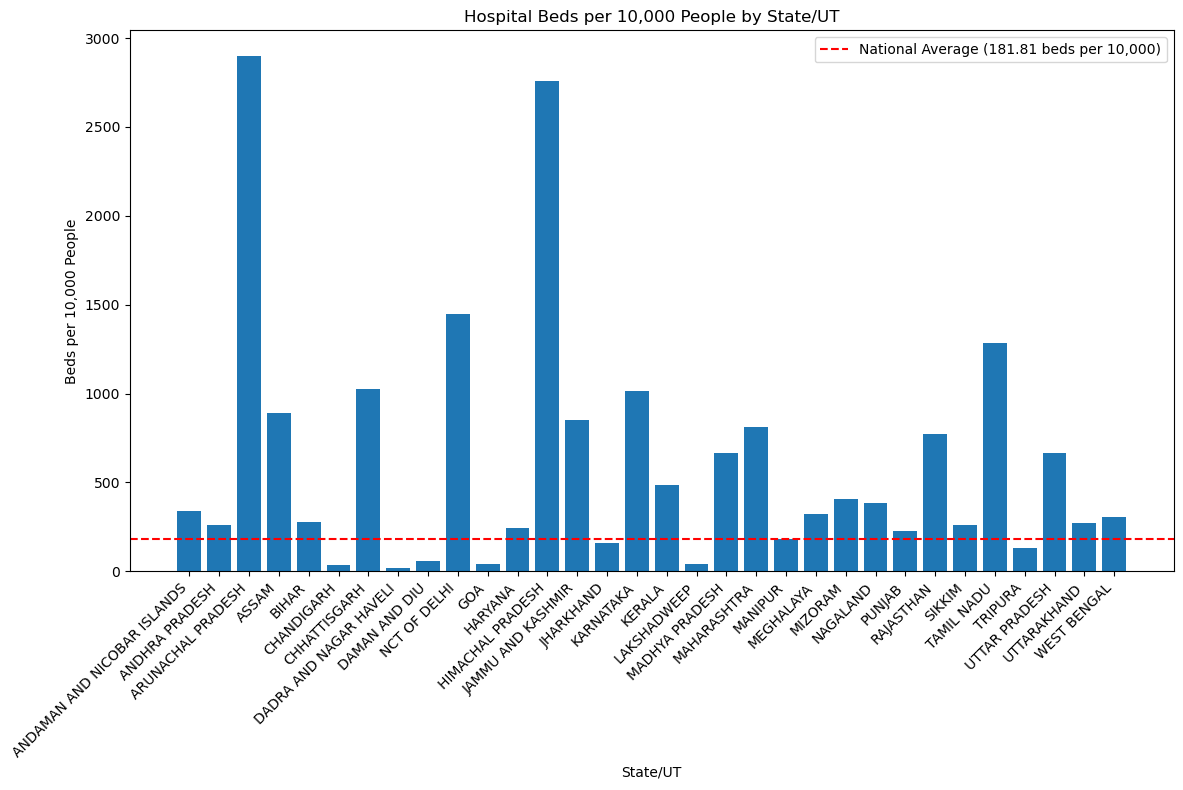

Three States/UTs with the least hospital beds per 10,000 people:
                   State/UT  Beds_per_10k
128           DAMAN AND DIU     15.587975
126  DADRA AND NAGAR HAVELI     16.525607
213               JHARKHAND     25.406168


In [10]:
# PROBLEM STATEMENT 12 - HARSHITHA.Y
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hospital_data = pd.read_csv('Clean_Data/all_hospitals (1).csv')
population_data = pd.read_csv('census.csv')
combined_data = pd.merge(hospital_data, population_data, on='State/UT')
combined_data['Beds_per_10k'] = (combined_data['Hospitalbeds'] / combined_data['Population']) * 10000
national_avg = combined_data['Hospitalbeds'].sum() / combined_data['Population'].sum() * 10000

plt.figure(figsize=(12, 8))
plt.bar(combined_data['State/UT'], combined_data['Beds_per_10k'])
plt.axhline(y=national_avg, color='r', linestyle='--', label=f'National Average ({national_avg:.2f} beds per 10,000)')
plt.xlabel('State/UT')
plt.ylabel('Beds per 10,000 People')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

combined_data['Beds_per_10k'] = pd.to_numeric(combined_data['Beds_per_10k'], errors='coerce')
lowest_states = combined_data.nsmallest(3, 'Beds_per_10k')
print("Three States/UTs with the least hospital beds per 10,000 people:")
print(lowest_states[['State/UT', 'Beds_per_10k']])

In [13]:
# PROBLEM STATEMENT 13 - NEEV SHAH
import pandas as pd
hospital_data = pd.read_csv("government_hospitals.csv", header=[0, 1])
hospital_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
                         'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']
hospital_data.to_csv("updated_hospital_data.csv", index=False)
print(hospital_data.head())

             State/UT  Rural_Government_Hospitals  Rural_Government_Beds  \
0      Andhra Pradesh                         193                   6480   
1  Arunachal Pradesh*                         208                   2136   
2               Assam                        1176                  10944   
3               Bihar                         930                   6083   
4        Chhattisgarh                         169                   5070   

   Urban_Government_Hospitals  Urban_Government_Beds Last_Updated  
0                          65                  16658   01.01.2017  
1                          10                    268   31.12.2017  
2                          50                   6198   31.12.2017  
3                         103                   5936   31.12.2016  
4                          45                   4342   01.01.2016  


In [32]:
# PROBLEM STATEMENT 14 - NEEV SHAH
import pandas as pd
from datetime import datetime
import os

def fix_state_name(name):
    return name

government_hospital_data = pd.read_csv("government_hospitals.csv")
government_hospital_data["Last_Updated"] = pd.to_datetime(government_hospital_data["As on"], format="%d.%m.%Y").dt.strftime("%Y-%m-%d")
government_hospital_data["State/UT"] = government_hospital_data["States/UTs"].apply(fix_state_name)
clean_folder_path = "Clean/"

if not os.path.exists(clean_folder_path):
    os.makedirs(clean_folder_path)
government_hospital_data.to_csv(clean_folder_path + "government_hospital.csv", index=False)
print("Code executed successfully. Updated government hospital data saved to 'Clean/government_hospital.csv'.")

Code executed successfully. Updated government hospital data saved to 'Clean/government_hospital.csv'.
